<a href="https://colab.research.google.com/github/kynemre/DataMining/blob/main/02_Veri_Ke%C5%9Ffi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#İris Veri Setinin İnclenmesi

<img loading="lazy" height="250" src="https://blog.ciceksepeti.com/wp-content/uploads/2015/07/iris-gif-1.gif" alt="İris çiçeği" title="İris çiçeği">
<br><small>İris Çiçeği</small>

<p></br>
<a href="http://archive.ics.uci.edu/ml/datasets/Iris" title="Veri Setinin Kaynağına Git">Iris veri seti</a> <a href="https://en.wikipedia.org/wiki/Ronald_Fisher" title="Fisher Hakkında Daha Fazla Bilgi">R.A. Fisher</a> tarafından 1936 yılında yayınlanan <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1111/j.1469-1809.1936.tb02137.x" title="Makaleye Git">The use of multiple measurements in taxonomic problems</a> isimli çalışmada bu veri seti kullanıldı. Veri seti, <a href="https://en.wikipedia.org/wiki/Edgar_Anderson" title="Anderson Hakkında Daha Fazla Bilgi">Edgar Anderson</a> isimli Amerikalı bir botanikçi tarafından toplanmıştır. 
</p><hr><br>

<p>
Veri seti 150 örnek ve 5 nitelikten oluşur. Nitelikler, çanak yaprak uzunluğu, çanak yaprak genişliği, taç yaprak uzunluğu ve çiçeğin türü şeklindedir. Uzunluklar cm biriminde verilmiştir. Veri setinde, eşit miktarda, Iris Setosa, Iris Versicolour ve Iris Virginica türünde örnekler vardır.
</p>
<p>
<a href="https://kedro.readthedocs.io/en/stable/02_get_started/05_example_project.html" title="Görselin kaynağına git"><img src="https://kedro.readthedocs.io/en/stable/_images/iris_measurements.png" height=200 alt="İris çiçeği taç ve çanak yaprakları boyutları"></a><br><small>İris Çiçeğinin Taç ve Çanak Yapraklarının Uzunluğu ve Genişliği</small>
</p>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Veri Setinin Yüklenmesi ve Düzenlenmesi

In [ ]:
data_path = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data_org = pd.read_table(data_path, delimiter=',', header=None)
data_org.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Veri seti aynı zamanda *Sklearn* veya *Plotly* gibi kütüphanelerde bulunmaktadır.

sklear Kütüphanesi İçin Veri Setinin Yüklenmesi

```
from sklearn import datasets
iris = datasets.load_iris()
```
plotly Kütüphanesi İçin Veri Setinin Yüklenmesi


```
import plotly.express as px
df = px.data.iris()
```


In [ ]:
data = data_org.copy()
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<h3>Eksik Veri Kontrolü</h3>

In [ ]:
data.isna().any().any()

False

#Veri Setinin İstatistik Analizi

<h3>Her niceliksel özellik için ortalama, standart sapma, minimum ve maksimum değerleri hesaplama</h3>

In [ ]:
statistics = pd.DataFrame(columns=['keys', 'sepal length', 'sepal width', 'petal length', 'petal width'])
statistics.loc[len(statistics.index)] = ["count", len(data['sepal length']),
                                         len(data['sepal width']),
                                         len(data['petal length']),
                                         len(data['petal length'])]
statistics.loc[len(statistics.index)] = ["mean", round(np.mean(data['sepal length']),2),
                                         round(np.mean(data['sepal width']),2),
                                         round(np.mean(data['petal length']),2),
                                         round(np.mean(data['petal length']),2)]
statistics.loc[len(statistics.index)] = ["std", round(np.std(data['sepal length']),2),
                                         round(np.std(data['sepal width']),2),
                                         round(np.std(data['petal length']),2),
                                         round(np.std(data['petal length']),2)]
statistics.loc[len(statistics.index)] = ["min", min(data['sepal length']),
                                         min(data['sepal width']),
                                         min(data['petal length']),
                                         min(data['petal length'])]
statistics.loc[len(statistics.index)] = ["max", max(data['sepal length']),
                                         max(data['sepal width']),
                                         max(data['petal length']),
                                         max(data['petal length'])]                                                                                 
statistics.set_index(keys="keys", inplace=True)
statistics

,sepal length,sepal width,petal length,petal width
keys,,,,
count,150,150,150,150
mean,5.84,3.05,3.76,3.76
std,0.83,0.43,1.76,1.76
min,4.3,2,1,1
max,7.9,4.4,6.9,6.9


<h3>Pandas Kütüphasi ile Veri Setinin Özeti</h3>

In [ ]:
data.describe(include="all").round(2)

,sepal length,sepal width,petal length,petal width,class
count,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.84,3.05,3.76,1.20,NaN
std,0.83,0.43,1.76,0.76,NaN
min,4.30,2.00,1.00,0.10,NaN
25%,5.10,2.80,1.60,0.30,NaN
50%,5.80,3.00,4.35,1.30,NaN
75%,6.40,3.30,5.10,1.80,NaN


<h3>Veri Setinin Kovaryansı</h3>

In [ ]:
data.cov().round(2)

,sepal length,sepal width,petal length,petal width
sepal length,0.69,-0.04,1.27,0.52
sepal width,-0.04,0.19,-0.32,-0.12
petal length,1.27,-0.32,3.11,1.30
petal width,0.52,-0.12,1.30,0.58


<h3>Veri Setinin Korelasyonu</h3>

In [ ]:
data.corr().round(2)

,sepal length,sepal width,petal length,petal width
sepal length,1.00,-0.11,0.87,0.82
sepal width,-0.11,1.00,-0.42,-0.36
petal length,0.87,-0.42,1.00,0.96
petal width,0.82,-0.36,0.96,1.00


#Veri Setinin Görselleştirme

<h3>Histogram Analizi</h3>

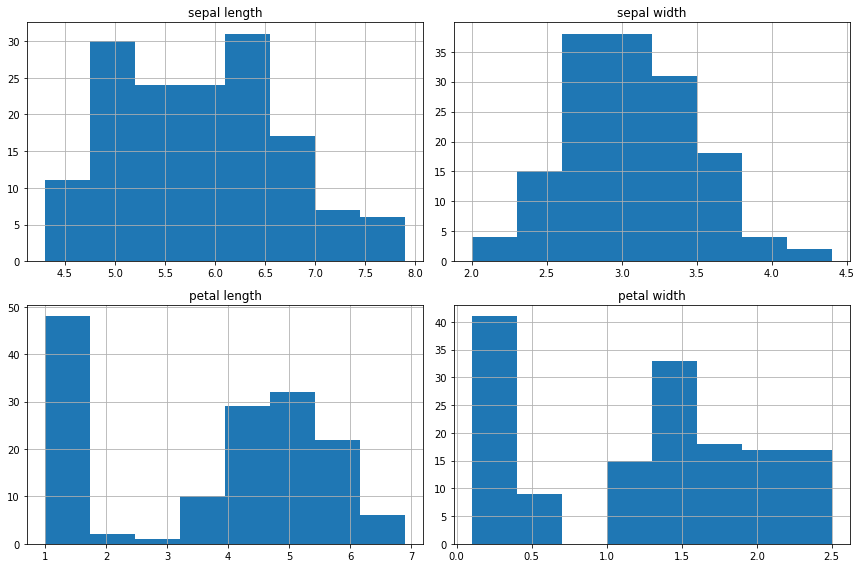

In [ ]:
data.hist(bins=8);
plt.tight_layout(rect=(0,0,2,2))

<h3>Tüm Veri Seti İçin Kutu Grafiği</h3>

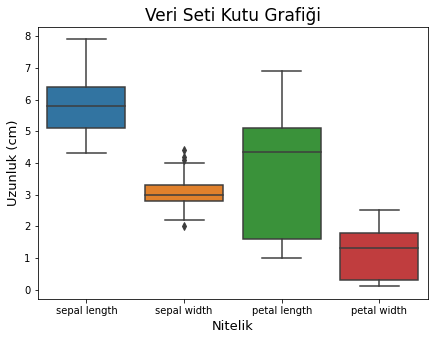

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x="variable", y="value", data=pd.melt(data[['sepal length', 
                                                        'sepal width',
                                                        'petal length',
                                                        'petal width']]))
plt.title("Veri Seti Kutu Grafiği", fontsize=17);
plt.ylabel("Uzunluk (cm)", fontsize=13);
plt.xlabel("Nitelik", fontsize=13);
plt.show()

<h3>Iris Setosa Sınıfının Nitelikleri İçin Box Plot Grafiği</h3>

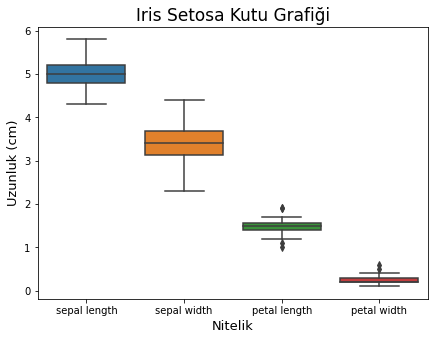

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x="variable", y="value", data=pd.melt(data[data["class"]=="Iris-setosa"][['sepal length', 
                                                        'sepal width',
                                                        'petal length',
                                                        'petal width']]))
plt.title("Iris Setosa Kutu Grafiği", fontsize=17);
plt.ylabel("Uzunluk (cm)", fontsize=13);
plt.xlabel("Nitelik", fontsize=13);
plt.show()

<h3>Iris Versicolor Sınıfının Nitelikleri İçin Box Plot Grafiği</h3>

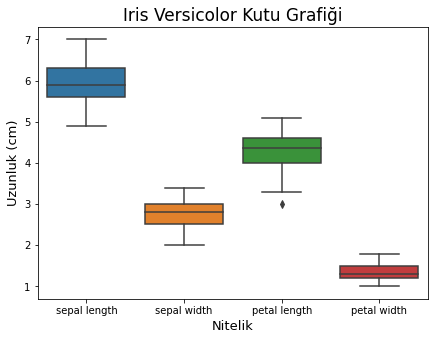

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x="variable", y="value", data=pd.melt(data[data["class"]=="Iris-versicolor"][['sepal length', 
                                                        'sepal width',
                                                        'petal length',
                                                        'petal width']]))
plt.title("Iris Versicolor Kutu Grafiği", fontsize=17);
plt.ylabel("Uzunluk (cm)", fontsize=13);
plt.xlabel("Nitelik", fontsize=13);
plt.show()

<h3>Iris Virginica Sınıfının Nitelikleri İçin Box Plot Grafiği</h3>

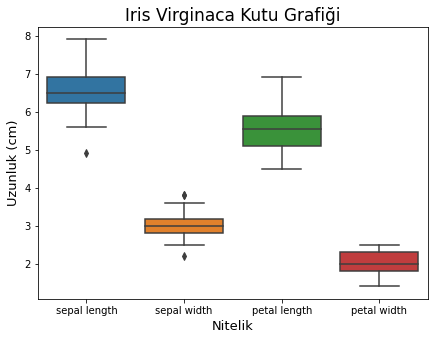

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x="variable", y="value", data=pd.melt(data[data["class"]=="Iris-virginica"][['sepal length', 
                                                        'sepal width',
                                                        'petal length',
                                                        'petal width']]))
plt.title("Iris Virginaca Kutu Grafiği", fontsize=17);
plt.ylabel("Uzunluk (cm)", fontsize=13);
plt.xlabel("Nitelik", fontsize=13);
plt.show()

<h3>Her Nitelik Çifti İçin Dağılım Grafikleri</h3>

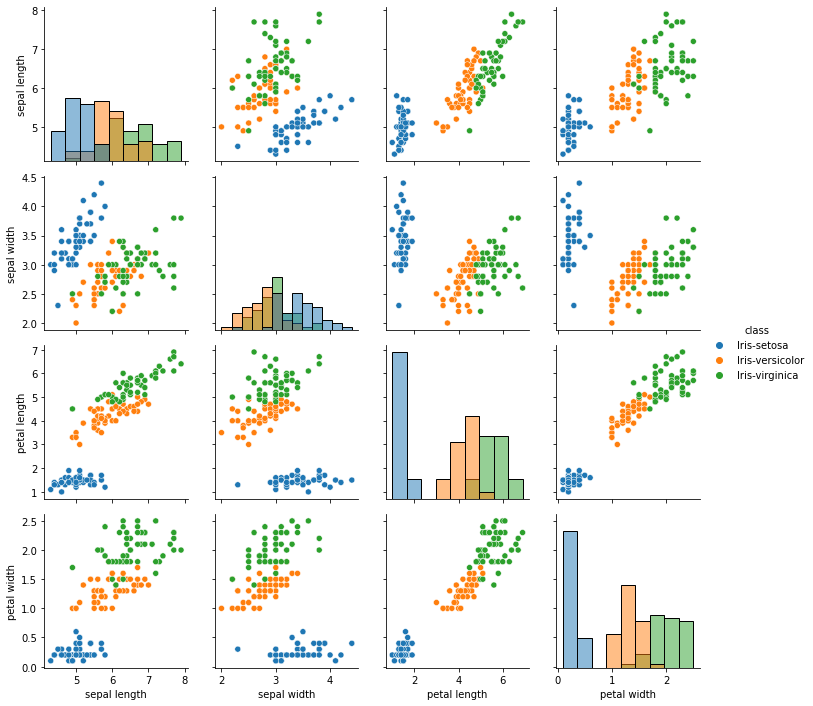

In [ ]:
g = sns.PairGrid(data, hue="class");
g.map_diag(sns.histplot);
g.map_offdiag(sns.scatterplot);
g.add_legend();

<h3>Tüm Örnekleri İçeren Paralel Koordinatlar Grafiği</h3>

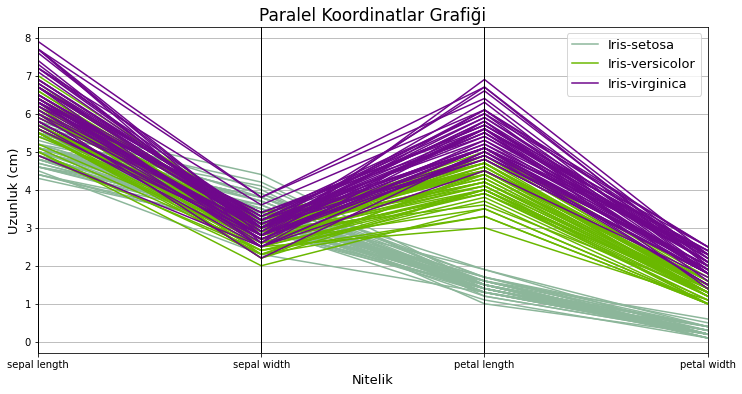

In [ ]:
plt.figure(figsize=(12,6));
pd.plotting.parallel_coordinates(data,"class");
plt.title("Paralel Koordinatlar Grafiği", fontsize=17);
plt.ylabel("Uzunluk (cm)", fontsize=13);
plt.xlabel("Nitelik", fontsize=13);
plt.legend(fontsize=13);

#Verilerin **Plotly** Kütüphanesi ile Görselleştirilmesi

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

<h3>Histogram Analizi</h3>

In [ ]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("Sepal Length", 
                                                    "Sepal Width", 
                                                    "Petal Length", 
                                                    "Petal Width"))

fig.append_trace(go.Histogram(x=data["sepal length"], 
                              nbinsx=8, 
                              name="Sepal Length"), 1, 1)
fig.append_trace(go.Histogram(x=data["sepal width"], 
                              nbinsx=8,
                              name="Sepal Width"), 1, 2)
fig.append_trace(go.Histogram(x=data["petal length"], 
                              nbinsx=8,
                              name="Petal Length"), 2, 1)
fig.append_trace(go.Histogram(x=data["petal width"], 
                              nbinsx=8,
                              name="Petal Width"), 2, 2)

fig.update_xaxes(title_text="Uzunluk (cm)", row=1, col=1)
fig.update_xaxes(title_text="Uzunluk (cm)", row=1, col=2)
fig.update_xaxes(title_text="Uzunluk (cm)", row=2, col=1)
fig.update_xaxes(title_text="Uzunluk (cm)", row=2, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="Değer Tekrarı", row=1, col=1)
fig.update_yaxes(title_text="Değer Tekrarı", row=1, col=2)
fig.update_yaxes(title_text="Değer Tekrarı", row=2, col=1)
fig.update_yaxes(title_text="Değer Tekrarı", row=2, col=2)

fig.update_layout(height=600, width=900,
                  title_text="İris Veri Seti Niteliklerinin Histogramları",
                  showlegend=True)

fig.show()
#fig.write_html("İris Veri Seti Niteliklerinin Histogramları.html")

<h3>Kutu Grafiği</h3>

In [ ]:
fig = go.Figure()

fig.add_trace(go.Box(y=data["sepal length"],name="Sepal Length"))
fig.add_trace(go.Box(y=data["sepal width"],name="Sepal Width"))
fig.add_trace(go.Box(y=data["petal length"], name="Petal Length"))
fig.add_trace(go.Box(y=data["petal width"],name="Petal Width"))

fig.update_layout(height=500, width=1200,
                  xaxis=dict(title='Nitelikler'),
                  yaxis=dict(title='Uzunluk (cm)'),
                  title_text="Tüm Çiçek Türlerini İçeren Kutu Grafiği",
                  showlegend=True)

fig.show()
#fig.write_html("Tüm Çiçek Türlerini İçeren Kutu Grafiği.html")

In [ ]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("Tüm Sınıflar",
                                                    "Iris-setosa",
                                                    "Iris-versicolor",
                                                    "Iris-virginica"))

for i,cls in enumerate(["","Iris-versicolor","Iris-setosa","Iris-virginica"]):
    j_kontrol = True
    for j_,att in enumerate(['sepal length', 'sepal width', 'petal length', 'petal width']):
        if j_kontrol:
            j = j_
            j_kontrol = False
            if i>=2:
                j+=1
        if cls != "":
            fig.append_trace(go.Box(y=data[data["class"]==cls][att],name=att), (i%2)+1, (j%2)+1)
            fig.update_yaxes(title_text="Uzunluk (cm)", row=(i%2)+1, col=(j%2)+1)
            fig.update_xaxes(title_text="Nitelik", row=(i%2)+1, col=(j%2)+1)
        else:
            fig.append_trace(go.Box(y=data[att],name=att), (i%2)+1, (j%2)+1)
            fig.update_yaxes(title_text="Uzunluk (cm)", row=(i%2)+1, col=(j%2)+1)
            fig.update_xaxes(title_text="Nitelik", row=(i%2)+1, col=(j%2)+1)

fig.update_layout(height=800, width=900,
                  title_text="Kutu Grafikleri",
                  showlegend=False)

fig.show()
fig.write_html("Kutu Grafikerli.html")

<h3>Dağılım Grafikleri</h3>

In [ ]:
fig = px.scatter_matrix(data, dimensions=["sepal width", 
                                          "sepal length", 
                                          "petal width", 
                                          "petal length"], 
                        color="class",
                        title="Nitelik Çiftlerinin Dağılım Grafikleri",
                        width=1200, height=600)
fig.show()
#fig.write_html("Nitelik Çiftlerinin Dağılım Grafikleri.html")

<h3>Paralel Koordinatlar Grafiği</h3>

In [ ]:
df = data.copy()
df["class"] = df["class"].astype("category").cat.codes
fig = px.parallel_coordinates(df,
                              dimensions=['sepal width', 'sepal length', 
                                          'petal width', 'petal length'],
                               color="class", 
                              labels={"class": "Class",
                                      "sepal_width": "Sepal Width", 
                                      "sepal_length": "Sepal Length",
                                      "petal_width": "Petal Width", 
                                      "petal_length": "Petal Length",},
                              title="Türlerine Göre İris Çiçeği Niteliklerinin Paralel Koordinatlar Grafiği")

fig.show()
#fig.write_html("Türlerine Göre İris Çiçeği Niteliklerinin Paralel Koordinatlar Grafiği.html")